In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelEncoder

In [3]:
col_names = ["filename","chroma_stft","spectral_centroid","spectral_bandwidth","rolloff","zero_crossing_rate","mfcc1","mfcc2","mfcc3","mfcc4","mfcc5","mfcc6","mfcc7","mfcc8","mfcc9","mfcc10","mfcc11","mfcc12","mfcc13","mfcc14","mfcc15","mfcc16","mfcc17","mfcc18","mfcc19","mfcc20","label" ]
data = pd.read_csv("data_emg.csv", names=col_names)
data_1 = pd.read_csv("data_nonemg.csv" , names = col_names)

In [4]:
print(data.shape)

(123, 27)


In [5]:
print(data_1.shape)

(123, 27)


In [6]:
data.head()

,filename,chroma_stft,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
16.wav,0.336735,0.139032,2319.077218,2253.280541,4433.562293,0.136306,-46.939845,96.082878,-34.760861,6.555476,...,1.336271,-12.225394,1.636775,-13.770354,-3.576074,-13.023877,-5.139051,-8.861365,1.189709,emg
115.wav,0.366516,0.121893,1429.716923,1436.014835,2135.306960,0.087938,-183.400367,147.385682,-50.888940,-18.983834,...,4.311789,-8.041852,-5.194807,-9.175669,8.424673,-0.666838,4.417144,-4.197929,2.284233,emg
129.wav,0.152577,0.129218,1719.699268,1557.988425,3210.931866,0.118277,-174.354378,126.503773,-40.680083,19.329856,...,8.058940,9.352358,9.306955,-2.078496,-2.652938,-6.436986,-11.161624,-9.202338,18.568309,emg
114.wav,0.368252,0.127702,1736.103588,1736.869814,2937.832876,0.106887,-94.540492,138.255575,-45.451346,5.874052,...,5.647712,-1.894431,-5.966371,-7.954815,7.424956,-3.828139,-2.738114,-3.914032,1.552890,emg
101.wav,0.357789,0.059673,1607.607983,1176.641100,2759.769851,0.122878,-227.530012,190.436873,-122.439689,69.724357,...,-1.829177,-0.084204,26.161006,-10.485490,-1.259245,-2.835080,-9.586060,7.707302,-4.592865,emg


In [7]:
data_1.head()

,filename,chroma_stft,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
1643.wav,0.628479,0.125002,1170.211118,977.385758,2353.951792,0.080670,-179.370990,275.965275,-113.131341,27.954429,...,-14.901137,10.937928,-17.354135,-2.214828,4.980945,-17.041255,-0.488682,-4.738972,-15.025646,nonemg
1508.wav,0.405301,0.187296,2222.765628,2251.512646,4379.522236,0.109131,-54.742289,99.070404,-24.679054,25.085460,...,-1.012706,-6.250167,0.400600,-9.520970,2.374747,-2.931647,-1.860034,-2.468395,-0.965646,nonemg
1452.wav,0.669726,0.012735,3711.428186,1978.700442,5811.273193,0.352595,-287.306574,70.932305,-69.379899,81.057205,...,-5.312476,-0.694801,-18.363962,-3.028178,-12.914511,-5.550405,-6.655982,-4.528847,-1.803591,nonemg
1484.wav,0.551086,0.049560,1447.333364,1878.963239,3042.807242,0.059373,-212.849874,140.594905,-10.264296,39.272801,...,8.591747,-9.062635,3.119594,-9.065744,4.451496,-11.833892,1.461118,-9.334039,0.370976,nonemg
1246.wav,0.521930,0.050788,5079.577903,3015.264400,8532.117638,0.429744,-103.052190,0.953892,-10.317923,-19.803503,...,6.531930,-7.390513,0.761238,-11.307439,-0.235426,-7.333210,5.047840,-0.961889,5.544510,nonemg


In [8]:
train = pd.concat([data , data_1])

In [9]:
train.shape

(246, 27)

In [10]:
train =train.sample(frac = 1)

In [11]:
train.shape

(246, 27)

In [12]:
train.head(5)

,filename,chroma_stft,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
1589.wav,0.223390,0.000284,609.529337,750.206370,1103.162560,0.029316,-938.619912,60.773730,-5.337858,-1.696135,...,-0.568970,-2.642049,0.800943,-3.287903,-1.300352,-1.969187,2.387371,-1.377289,1.099834,nonemg
58_2.wav,0.206415,0.137224,1503.883204,1210.816549,2742.791748,0.088952,-238.381432,134.892806,-84.341557,39.380126,...,-3.966178,-15.294872,15.485809,7.927618,27.158918,33.708923,12.544305,0.726681,-10.445794,emg
48.wav,0.222470,0.223887,2642.780855,2162.426833,5382.679631,0.133357,-146.363536,50.564367,-31.343019,18.172621,...,6.113493,7.471029,18.968931,-3.340615,-22.257784,-12.375447,-0.103323,-17.504652,4.975380,emg
1381.wav,0.663291,0.068590,1868.635096,2354.388293,4477.663950,0.056650,-156.732449,100.784709,-6.351665,30.516442,...,12.022528,-2.551857,6.985410,-2.505787,6.919369,-2.684377,3.042210,-5.149180,4.036902,nonemg
1100.wav,0.449446,0.098963,2274.523060,2092.719322,4415.548941,0.135770,-145.347646,101.057871,-33.851112,13.924831,...,4.671365,-4.947416,7.517039,-6.070449,3.839639,-5.647685,5.260220,-4.676338,2.264027,nonemg


In [13]:
train.drop("filename" , axis = 1 , inplace = True)

In [14]:
le = LabelEncoder()
train['label'] = le.fit_transform(train['label'])

In [15]:
y = train.pop("label")

In [29]:
max_depths = np.linspace(1, 30, 30, endpoint=True)

In [30]:
training_results = []
testing_results = []
for max_depth in max_depths:
    clf = DecisionTreeClassifier(max_depth=max_depth)
    clf.fit(x_train, y_train)
    train_pred = clf.predict(x_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    training_results.append(roc_auc)
   
    y_pred = clf.predict(x_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    testing_results.append(roc_auc)

In [31]:
from matplotlib.legend_handler import HandlerLine2D

No handles with labels found to put in legend.


Text(0.5, 0, 'Tree_depth')

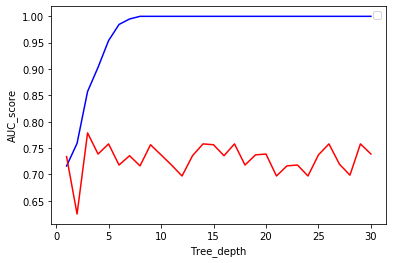

In [32]:
line1, = plt.plot(max_depths, training_results, "b")
line2, = plt.plot(max_depths, testing_results, "r")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC_score")
plt.xlabel("Tree_depth")

Text(0.5, 0, 'min samples split')

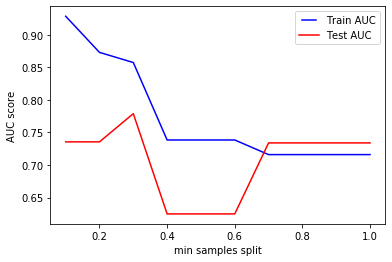

In [33]:
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
train_results = []
test_results = []
for min_samples_split in min_samples_splits:
    clf = DecisionTreeClassifier(min_samples_split=min_samples_split)
    clf.fit(x_train, y_train)
    train_pred = clf.predict(x_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = clf.predict(x_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
line1, = plt.plot(min_samples_splits, train_results, "b", label="Train AUC")
line2, = plt.plot(min_samples_splits, test_results, "r" , label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel("min samples split")

Text(0.5, 0, 'min samples leaf')

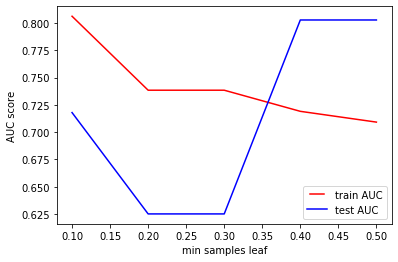

In [34]:
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
train_results = []
test_results = []
for min_samples_leaf in min_samples_leafs:
    clf = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf)
    clf.fit(x_train, y_train)
    train_pred = clf.predict(x_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = clf.predict(x_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)

line1, = plt.plot(min_samples_leafs, train_results, "r", label="train AUC")
line2, = plt.plot(min_samples_leafs, test_results, "b", label="test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel("min samples leaf")

Text(0.5, 0, 'max features')

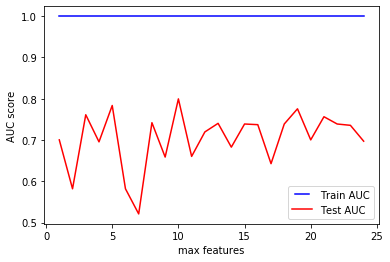

In [35]:
max_features = list(range(1,train.shape[1]))
train_results = []
test_results = []
for max_feature in max_features:
    clf = DecisionTreeClassifier(max_features=max_feature)
    clf.fit(x_train, y_train)
    train_pred = clf.predict(x_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = clf.predict(x_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)

line1, = plt.plot(max_features, train_results, "b", label="Train AUC")
line2, = plt.plot(max_features, test_results, "r" , label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel("max features")

In [36]:
scores =[]
a = list(range(1,31))
for i in a:
    x_train, x_test, y_train, y_test = train_test_split(train, y , test_size=0.20 , random_state = i)
    clf =DecisionTreeClassifier(max_depth = 26 , min_samples_split = 0.3 , min_samples_leaf= 0.48 )
    clf.fit(x_train , y_train)
    y_pred = clf.predict(x_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    scores.append(roc_auc) 

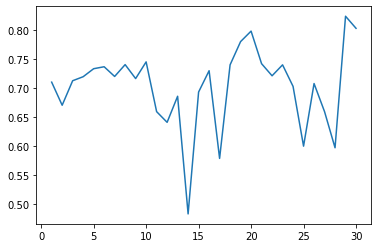

In [37]:
plt.plot(a , scores)

In [38]:
max(scores)

0.8236714975845411